# Proyecto 3

### Abner Hernández Rodríguez

## Problema 1

#### Calcular el mejor polinomio de aproximación a los datos

In [251]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt

Cargamos los datos

In [252]:
data_p1=pd.read_csv('problem1.csv')
data_p1.head()

,X_training,Y_training,X_test,Y_test
0,-2.00,22.067387,2.00,6.024049
1,-1.97,19.944915,2.05,6.885408
2,-1.94,18.062490,2.10,7.578968
3,-1.91,16.384313,2.15,8.439467
4,-1.88,14.567798,2.20,9.554611


Dividimos los datos y nos deshacemos de los NaN en los datos de validación.

In [253]:
x = data_p1['X_training']
xt = data_p1['X_test']
y = data_p1['Y_training']
yt = data_p1['Y_test']

xt.dropna()
yt.dropna()
    
print(x)

0     -2.00
1     -1.97
2     -1.94
3     -1.91
4     -1.88
       ... 
129    1.87
130    1.90
131    1.93
132    1.96
133    1.99
Name: X_training, Length: 134, dtype: float64


Graficamos los datos de entrenamiento.

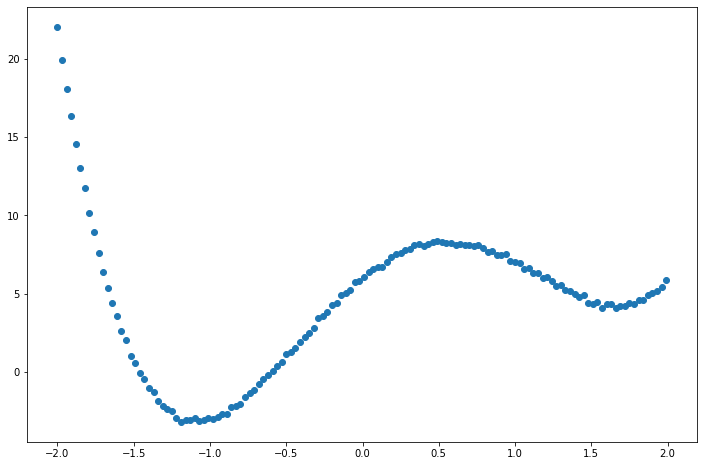

In [254]:
plt.figure(figsize=(12, 8))
plt.scatter(x,y,label='Data')
#plt.scatter(xt,yt,label='Test')
plt.show()

Como tiene 3 puntos críticos, sospechamos que un polinomio de grado 4 se aproximaría de buena forma a la curva. Así que procedemos a hacer el ajuste de un polinomio de grado 4.

In [255]:
import numpy.polynomial.polynomial as poly

Calculamos los coeficientes del polinomio.

In [256]:
coeficientes = poly.polyfit(x, y, 4,rcond=None,w=None) # Asumiendo un polinomio de grado 4

In [257]:
model = poly.Polynomial(coeficientes)
model

Polynomial([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109], domain=[-1,  1], window=[-1,  1])

Ahora graficamos los resultados, junto con las predicciones para la validación, y calculamos la suma residual de errores cuadrados del entrenamiento y de la validación. Esta suma residual es realmente baja, por lo que concluimos que es una buena aproximación a la curva.

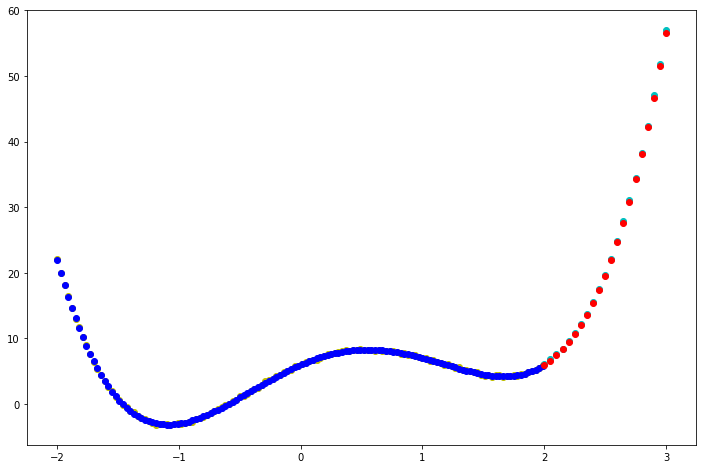

Suma residual de errores cuadrados del entrenamiento:  0.6253760482745622
Suma residual de errores cuadrados de la validación:  0.5171449619434759


In [258]:
plt.figure(figsize=(12, 8))
plt.scatter(x,y,color = 'y',label='Data')
plt.scatter(xt,yt,color = 'c',label='Test')

plt.scatter(x,model(x),color = 'b', label='Modelo')

plt.scatter(xt,model(xt),color = 'r', label='Prueba del modelo')

plt.show()


RSSv1 = 0.5*np.sum((y-model(x))**2)
RSSv2 = 0.5*np.sum((yt-model(xt))**2)

print("Suma residual de errores cuadrados del entrenamiento: ",RSSv1)
print("Suma residual de errores cuadrados de la validación: ",RSSv2)

Ahora usaremos el criterio AIC para hallar el mejor polinomio que aproxima a la curva. Evaluaremos para polinomios de grado 0 hasta grado 10.

In [259]:
Pol_Max = 10 # Grado máximo al que evaluaremos polinomios

RSSv = [] 
RSSv = np.zeros(Pol_Max-1)
AICv = []
AICv = np.zeros(Pol_Max-1)

In [260]:
for i in np.arange(0,Pol_Max-1,1):
        coef = poly.polyfit(x, y, i+1)
        model = poly.Polynomial(coef)
        RSSv[i]=0.5*np.sum((y-model(x))**2)
        AICv[i]=len(x)*math.log10(RSSv[i]/len(x))+ 2*len(coef)*len(x)/(len(x)-len(coef)-1)

Ahora graficamos los resultados.

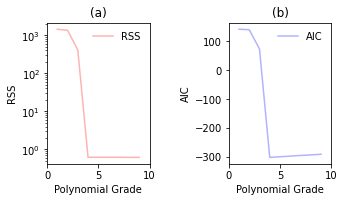

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(0,Pol_Max-1,1)+1, RSSv,'r',label = 'RSS',alpha=0.3)
ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)
ax1.set(xlabel='Polynomial Grade', ylabel='RSS')
ax1.set(xlim=(0, Pol_Max))
ax1.set_title('(a)')

# Segunda figura
fig.tight_layout(pad=5.0)
ax2.plot(np.arange(0,Pol_Max-1,1)+1, AICv,'b',label='AIC',alpha=0.3)
ax2.set(xlabel='Polynomial Grade', ylabel='RSS')
ax2.legend(loc='best', frameon=False)
ax2.set(xlabel='Polynomial Grade', ylabel='AIC')
ax2.set(xlim=(0, Pol_Max))
ax2.set_title('(b)')
plt.show()

El grado mínimo obtenido por el criterio AIC es el 4.

In [262]:
grade = np.argmin(AICv)+1
grade

4

Que coincide con el primero calculado.

In [263]:
poly.polyfit(x, y, grade)

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

In [264]:
coeficientes

array([ 6.0000592 ,  8.02956741, -5.99141415, -3.00869471,  1.99588109])

## Problema 2

De un ensayo clínico, tenemos 12 pacientes con infección por VIH. Después del tratamiento, la enfermedad
progresó en 6 pacientes (1) y en 6 pacientes la infección no progresó (0). Cuatro medidas
se toman en los 12 pacientes (edad, niveles de azúcar, niveles de células T y colesterol). Que medida
se puede utilizar como marcador para describir la progresión de la enfermedad? Cuáles serán los criterios a predecir la progresión? Los datos se pueden encontrar en "problema2.csv (x_age, x_sugar, x_Tcell, x_cholesterol,
Salir). Ordene los datos y explique brevemente sus resultados. La variable "y" (objetivo) es un vector de 0
y 1 para representar la progresión.

Primero descargamos los datos.

In [265]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt

data_p2=pd.read_csv('problem2.csv')

data_p2.head()

,x_age,35,18,22,23,28,38,40,25,35.1,34,25.1,20
0,x_cholesterol,220,240,260,220,180,280,235,200,150,280,275,150
1,x_sugar,80,120,55,75,100,74,175,180,240,130,150,125
2,x_Tcell,550,600,580,575,620,674,275,180,140,80,250,325
3,y,0,0,0,0,0,0,1,1,1,1,1,1


Notemos que hay un problema con la columna de 'edad', pues esta forma parte de los índices de la columna. Los siguientes pasos reordenan los datos.

In [266]:
k = data_p2.transpose().index
k = pd.DataFrame({'T':k})

a=[]
for i in range(13):
    a.append(i)
a = pd.Series(a)
data_p2 = data_p2.transpose().set_index(a)
data_p2 = pd.concat([data_p2,k],axis=1)
data_p2 = data_p2.transpose().set_index(0)
data_p2 = data_p2.transpose()
data_p2

,x_cholesterol,x_sugar,x_Tcell,y,x_age
1,220,80,550,0,35
2,240,120,600,0,18
3,260,55,580,0,22
4,220,75,575,0,23
5,180,100,620,0,28
6,280,74,674,0,38
7,235,175,275,1,40
8,200,180,180,1,25
9,150,240,140,1,35.1
10,280,130,80,1,34


Separamos los datos de las columnas.

In [267]:
xcol = data_p2['x_cholesterol']
xaz = data_p2['x_sugar']
xTc = data_p2['x_Tcell']
xed = data_p2['x_age']

y = data_p2['y']

Contamos los pacientes en los que progresó la enfermedad y en quienes no. Obtenemos 6 de cada uno.

In [268]:
data_p2['y'].value_counts()

1    6
0    6
Name: y, dtype: int64

En la siguiente entrada se intenta graficar las relaciones de los datos entre sí, pero al parecer la tabla aún carga problemas que no se logran arreglar en el reordenamiento.

In [269]:
"""import seaborn as sns

sns.pairplot(data_p2, hue='y', markers='o')
plt.show()"""

"import seaborn as sns\n\nsns.pairplot(data_p2, hue='y', markers='o')\nplt.show()"

Dado lo anterior, procedemos a rehacer la base de datos y a graficar las relaciones con 'seaborn'.

In [270]:
data_p2 = pd.DataFrame({'x_cholesterol':[220.0,240.0,260.0,220.0,180.0,280.0,235.0,200.0,150.0,280.0,275.0,150.0],
                       'x_sugar':[80.0,120.0,55.0,75.0,100.0,74.0,175.0,180.0,240.0,130.0,150.0,125.0],
                       'x_Tcell':[550.0,600.0,580.0,575.0,620.0,674.0,275.0,180.0,140.0,80.0,250.0,325.0],
                       'x_age':[35.0,18.0,22.0,23.0,28.0,38.0,40.0,25.0,35.1,34.0,25.1,20.0],
                       'y':[0,0,0,0,0,0,1,1,1,1,1,1]})
data_p2

,x_cholesterol,x_sugar,x_Tcell,x_age,y
0,220.0,80.0,550.0,35.0,0
1,240.0,120.0,600.0,18.0,0
2,260.0,55.0,580.0,22.0,0
3,220.0,75.0,575.0,23.0,0
4,180.0,100.0,620.0,28.0,0
5,280.0,74.0,674.0,38.0,0
6,235.0,175.0,275.0,40.0,1
7,200.0,180.0,180.0,25.0,1
8,150.0,240.0,140.0,35.1,1
9,280.0,130.0,80.0,34.0,1


El análisis de estas graficas se describe en el reporte.

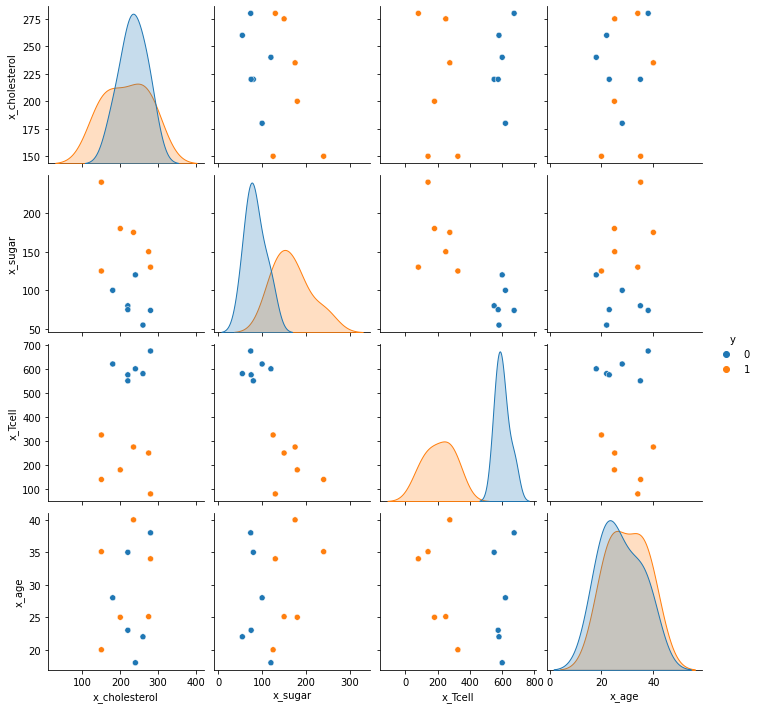

In [271]:
import seaborn as sns

sns.pairplot(data_p2, hue='y', markers='o')
plt.show()

Ahora queremos ver la relación directa entre los parámetros y el progreso de la enfermedad. Como resultado, es notable que la edad y el nivel de colesterol no son del todo determinantes en la respuesta a la enfermedad.

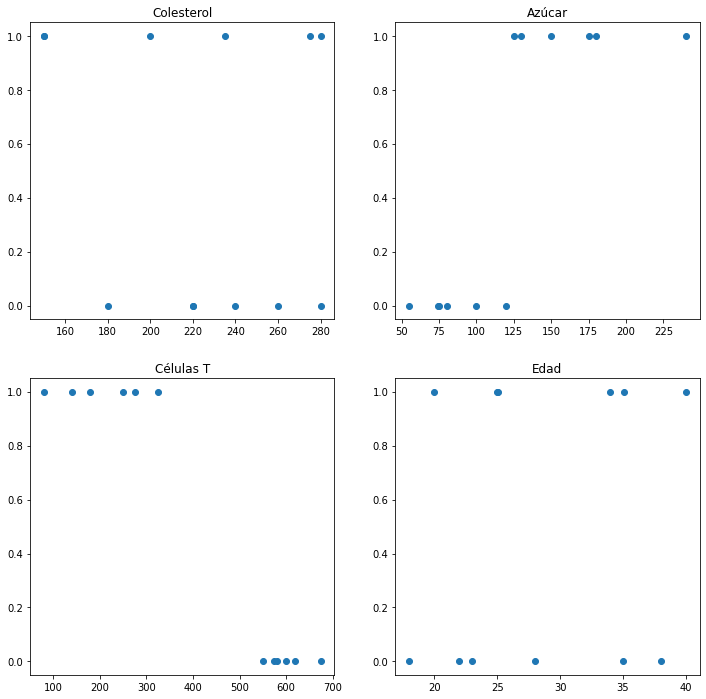

In [272]:
xcol = data_p2['x_cholesterol']
xaz = data_p2['x_sugar']
xTc = data_p2['x_Tcell']
xed = data_p2['x_age']

y = data_p2['y']

fig, a = plt.subplots(2,2, figsize = (12,12))

a[0][0].scatter(xcol, y)
a[0][0].set_title('Colesterol')

a[0][1].scatter(xaz, y)
a[0][1].set_title('Azúcar')

a[1][0].scatter(xTc, y)
a[1][0].set_title('Células T')

a[1][1].scatter(xed, y)
a[1][1].set_title('Edad')

plt.show()

Ahora dividiremos los datos para el entrenamiento y la validación.

In [273]:
X = data_p2[['x_cholesterol','x_sugar','x_Tcell','x_age']]
X = X
X

,x_cholesterol,x_sugar,x_Tcell,x_age
0,220.0,80.0,550.0,35.0
1,240.0,120.0,600.0,18.0
2,260.0,55.0,580.0,22.0
3,220.0,75.0,575.0,23.0
4,180.0,100.0,620.0,28.0
5,280.0,74.0,674.0,38.0
6,235.0,175.0,275.0,40.0
7,200.0,180.0,180.0,25.0
8,150.0,240.0,140.0,35.1
9,280.0,130.0,80.0,34.0


In [274]:
target = data_p2['y']
target

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
Name: y, dtype: int64

Se reparten de manera aleatoria con una distribución normal.

In [275]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=5)

In [276]:
x_train,y_train

(    x_cholesterol  x_sugar  x_Tcell  x_age
 9           280.0    130.0     80.0   34.0
 11          150.0    125.0    325.0   20.0
 4           180.0    100.0    620.0   28.0
 8           150.0    240.0    140.0   35.1
 1           240.0    120.0    600.0   18.0
 0           220.0     80.0    550.0   35.0
 10          275.0    150.0    250.0   25.1
 6           235.0    175.0    275.0   40.0
 3           220.0     75.0    575.0   23.0,
 9     1
 11    1
 4     0
 8     1
 1     0
 0     0
 10    1
 6     1
 3     0
 Name: y, dtype: int64)

In [277]:
x_test,y_test

(   x_cholesterol  x_sugar  x_Tcell  x_age
 7          200.0    180.0    180.0   25.0
 5          280.0     74.0    674.0   38.0
 2          260.0     55.0    580.0   22.0,
 7    1
 5    0
 2    0
 Name: y, dtype: int64)

Procederemos a hacer la clasificación con los métodos de discriminantes lineal y cuadrático, pues estos datos son bastante nobles y los métodos efectivos.

In [278]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Se puede cambiar de método quitando el comentario y comentando el otro.

También se imprime la exactitud de los métodos. Se concluye que la efectividad del método lineal es mejor.

In [279]:
model = LinearDiscriminantAnalysis()
#model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
print('Presición del clasificador en el conjunto de entrenamiento: {:.2f}' .format(model.score(x_train, y_train)))
print('Presición del clasificador en el conjunto de validación: {:.2f}'.format(model.score(x_test, y_test)))

Presición del clasificador en el conjunto de entrenamiento: 1.00
Presición del clasificador en el conjunto de validación: 1.00


Dados los resultados y las observaciones anteriores, sabemos que los mejores parámetros son la cantidad de células T y el nivel de azúcar. Así que reduciremos nuestros parámetros de predicción a estos dos.

In [280]:
X1 = x_train[['x_Tcell','x_sugar']]
Y1 = y_train

Ahora graficamos los resultados.

Primero determinaremos los límites de la figura.

In [281]:
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

h = 1.0

# Calculamos máximos y mínimos de estos parámetros

x_min, x_max = X1['x_Tcell'].min() - 60, X1['x_Tcell'].max() + 60
y_min, y_max = X1['x_sugar'].min() - 50, X1['x_sugar'].max() + 50
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Recalculamos el modelo de discriminante lineal con sólo los parámetros antes escogidos y para el conjunto de entrenamiento, e imprimimos la precisión de este prediciendo el conjunto de validación. Es totalmente efectivo.

In [282]:
from sklearn.metrics import accuracy_score
model.fit(X1,Y1)
X_test = x_test[['x_Tcell','x_sugar']]
Y_test = y_test
predictions=model.predict(X_test)
print(accuracy_score(Y_test,predictions))

1.0


Finalmente graficamos.

Los puntos azules son los pacientes en los que la enfermedad progresó, los rojos en los que no. La región amarilla es la región en la que se clasifica a los pacientes en los que la enfermedad progresaría con mayor probabilidad, y la morada es la región en la que no.

/home/abner/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



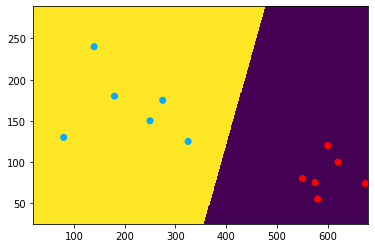

In [283]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')

plt.scatter(X1['x_Tcell'], X1['x_sugar'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['x_Tcell'], X_test['x_sugar'], c=y_test, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Ahora usaremos otro clasificador, el de los $k$-vecinos, con $k=5$.

In [284]:
from sklearn import neighbors
classifier=neighbors.KNeighborsClassifier(n_neighbors=5)

Entrenamos al clasificador.

In [285]:
classifier.fit(x_train,y_train)
y = classifier.predict(x_train)

Validamos con el conjunto de validación y calculamos la precisión.

In [286]:
predictions=classifier.predict(x_test)

In [287]:
from sklearn.metrics import accuracy_score
print('Presición del clasificador en el conjunto de entrenamiento: ',accuracy_score(y_train,y))
print('Presición del clasificador en el conjunto de validación: ',accuracy_score(y_test,predictions))

Presición del clasificador en el conjunto de entrenamiento:  1.0
Presición del clasificador en el conjunto de validación:  1.0


Al igual que con el clasificador anterior usaremos los parámetros del nivel de azúcar y la cantidad de células T.

In [288]:
X2 = x_train[['x_Tcell','x_sugar']]
Y2 = y_train

Calculamos los límites para graficar.

In [289]:

x_min, x_max = X2['x_Tcell'].min() - 60, X2['x_Tcell'].max() + 60
y_min, y_max = X2['x_sugar'].min() - 50, X2['x_sugar'].max() + 50
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Entrenamos el clasificador con los dos parámetros antes mencionados.

In [290]:
classifier.fit(X2,Y2)

KNeighborsClassifier()

Lo probamos con el conjunto de validación e imprimimos la precisión.

In [291]:
X_test = x_test[['x_Tcell','x_sugar']]
Y_test = y_test
predictions=classifier.predict(X_test)
print(accuracy_score(Y_test,predictions))

1.0


Determinamos las regiones de clasificación.

In [292]:

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Graficamos.

/home/abner/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



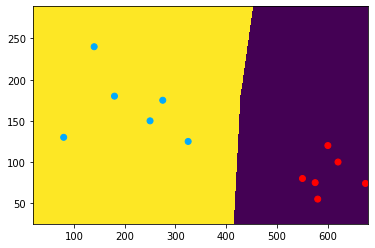

In [293]:

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap='viridis')
n_neighbors = 3

plt.scatter(X2['x_Tcell'], X2['x_sugar'], c=y_train, cmap=cmap_bold)
plt.scatter(X_test['x_Tcell'], X_test['x_sugar'], c=y_test, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Problema 3

Tenemos los datos del desempeño de 1000 alumnos en tres exámenes, junto con algunos datos que se tomarán como parámetros de su desempeño.

Nuestro objetivo será obtener las relaciones entre los parámetros y el desempeño de los alumnos, y, de ser posible, crear un modelo que prediga el desempeño de los alumnos.

(Base de datos obtenida de http://roycekimmons.com/tools/generated_data/exams )

Cargamos los datos.

In [294]:
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Calculamos las dimensiones y hacemos la cuenta de valores para determinar los valores posibles de cada categoría. También nos ayuda a saber si hay celdas con 'NaN'.

In [295]:
print(data.shape)

for i in data.columns:
    print(i)
    print(data[i].value_counts())

(1000, 8)
gender
female    518
male      482
Name: gender, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64
test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64
math score
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64
reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading score, Length: 72, dtype: int64
writing score
74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1

Por lo anterior notamos que las categorías contienen conceptos que se pueden ordenar y otros que no, éstos los enlistaremos para usar después. También crearemos un diccionario de los conceptos ordenables.

In [296]:
categ_nom = ['gender','race/ethnicity']
categ_ord = ['parental level of education','lunch','test preparation course']

In [297]:
dic_ord = { 'parental level of education':["master's degree","bachelor's degree","some college","associate's degree"
                                           ,"high school","some high school"],'lunch':['standard','free/reduced']
           ,'test preparation course':['completed','none'] }

Generamos una función para codificar los conceptos.

In [298]:
from sklearn.preprocessing import LabelEncoder

def codificar(ord_cat,nom_cat,data,test):
    
    le=LabelEncoder()
    k=0
    for col in ord_cat:
        le.fit(dic_ord[col])
        data[col] = le.transform(data[col])
        if len(test) != 0:
            test[col] = le.transform(test[col])
    for col in nom_cat:
        dum = pd.get_dummies(data[col])
        data = pd.concat([data, dum], axis=1)
        data.drop([col], axis=1, inplace=True)
        if len(test) != 0:
            dum = pd.get_dummies(test[col])
            test = pd.concat([test, dum], axis=1)
            test.drop([col], axis=1, inplace=True)
    if len(test) != 0:
        return data, test
    else:
        return data

Dividimos los datos en $X$ = datos conceptuales del alumno, y $target$ = calificaciones de los alumnos. 

In [299]:
X = data[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
target = data[['math score','reading score','writing score']]

Ahora obtendremos los promedios de los puntajes y su relación con cada parámetro del alumno.

In [300]:
from IPython.display import display

for i in X.columns:
    feat = data.groupby(i)[['math score','reading score','writing score']].mean().round(2).T
    
    display(feat)

gender,female,male
math score,63.63,68.73
reading score,72.61,65.47
writing score,72.47,63.31


race/ethnicity,group A,group B,group C,group D,group E
math score,61.63,63.45,64.46,67.36,73.82
reading score,64.67,67.35,69.10,70.03,73.03
writing score,62.67,65.60,67.83,70.15,71.41


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
math score,67.88,69.39,62.14,69.75,67.13,63.50
reading score,70.93,73.00,64.70,75.37,69.46,66.94
writing score,69.90,73.38,62.45,75.68,68.84,64.89


lunch,free/reduced,standard
math score,58.92,70.03
reading score,64.65,71.65
writing score,63.02,70.82


test preparation course,completed,none
math score,69.70,64.08
reading score,73.89,66.53
writing score,74.42,64.50


### En las siguientes entradas sólo se graficarán los datos anteriores para poder observarlos mejor. El análisis se hallará en el reporte.

Relación del rendimiento respecto al género.

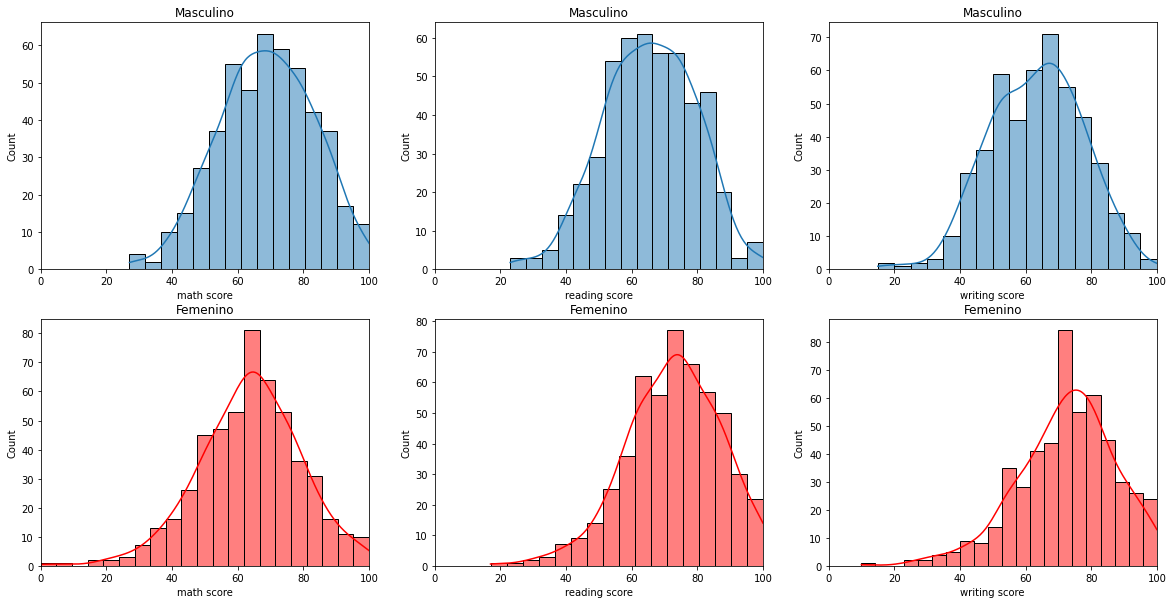

In [301]:
fig , axes = plt.subplots(2,3, figsize=(20,10))
sns.histplot(data[data['gender'] =='male']['math score'],kde=True,ax = axes[0][0])
sns.histplot(data[data['gender'] =='male']['reading score'],kde=True,ax = axes[0][1])
sns.histplot(data[data['gender'] =='male']['writing score'],kde=True,ax = axes[0][2])

sns.histplot(data[data['gender'] =='female']['math score'],kde=True,ax = axes[1][0],color='red')
sns.histplot(data[data['gender'] =='female']['reading score'],kde=True,ax = axes[1][1],color='red')
sns.histplot(data[data['gender'] =='female']['writing score'],kde=True,ax = axes[1][2],color='red')

for i in range(0,3):
    axes[0][i].set_title("Masculino")
    axes[1][i].set_title("Femenino")
    
    axes[0][i].set_xlim(0,100)
    axes[1][i].set_xlim(0,100)
plt.show()

Porcentaje de alumnos por grupo étnico.

In [302]:
import plotly.express as px

data['tmp'] = 1
fig = px.pie(data, names='race/ethnicity',values='tmp',hole = 0.8,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="Porcentaje por grupo étnico",
    annotations=[dict(text='Group', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

Desempeño respecto a grupo étnico.

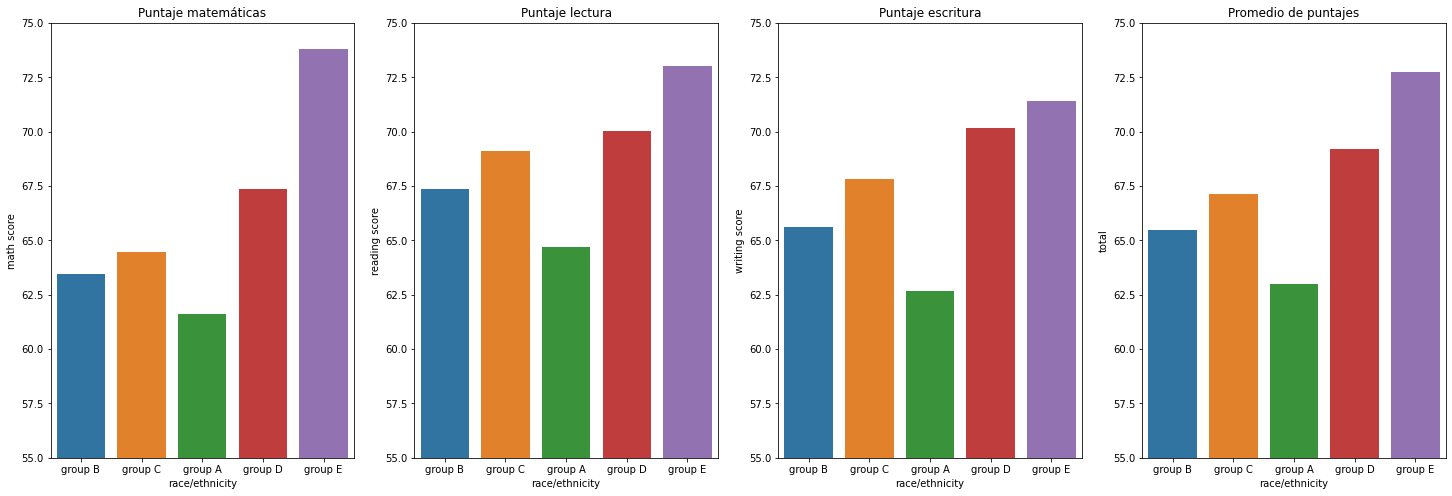

In [321]:
data['total'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
fig , axes = plt.subplots(1,4, figsize=(25,8))
sns.barplot(data = data, x='race/ethnicity', y='math score',ax = axes[0],ci=None)
axes[0].set_title("Puntaje matemáticas")
sns.barplot(data = data, x='race/ethnicity', y='reading score',ax = axes[1],ci=None)
axes[1].set_title("Puntaje lectura")
sns.barplot(data = data, x='race/ethnicity', y='writing score',ax = axes[2],ci=None)
axes[2].set_title("Puntaje escritura")
sns.barplot(data = data, x='race/ethnicity', y='total',ax = axes[3],ci=None)
axes[3].set_title("Promedio de puntajes")

for i in range(0,4):
    axes[i].set_ylim(55,75)
plt.show()

Desempeño respecto a escolaridad de los padres.

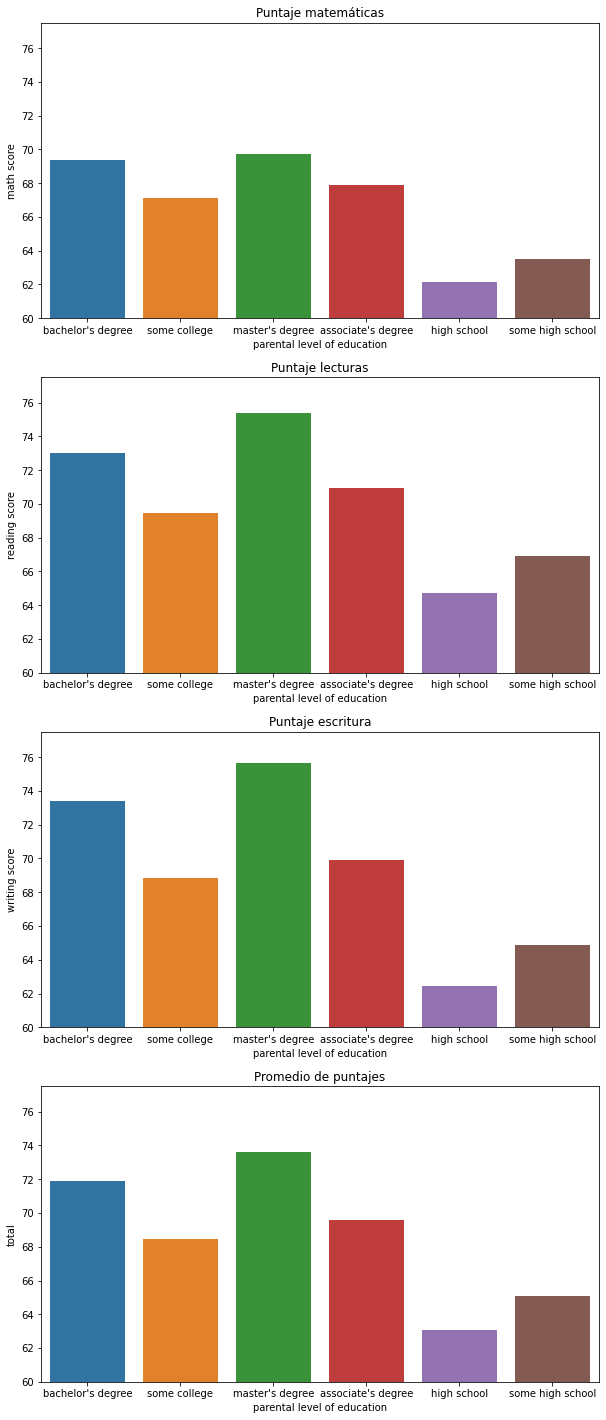

In [304]:


fig , axes = plt.subplots(4,1, figsize=(10,25),sharey=True)
sns.barplot(data = data, x='parental level of education', y='math score',ax = axes[0],ci=None)
axes[0].set_title("Puntaje matemáticas")
sns.barplot(data = data, x='parental level of education', y='reading score',ax = axes[1],ci=None)
axes[1].set_title("Puntaje lecturas")
sns.barplot(data = data, x='parental level of education', y='writing score',ax = axes[2],ci=None)
axes[2].set_title("Puntaje escritura")
sns.barplot(data = data, x='parental level of education', y='total',ax = axes[3],ci=None)
axes[3].set_title("Promedio de puntajes")

for i in range(0,4):
    axes[i].set_ylim(60,77.5)

plt.show()



Desempeño respecto al tipo de almuerzo.

In [305]:
from plotly.subplots import make_subplots

import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "domain"}, {"type": "xy"}]],)
fig.add_trace(go.Pie(labels=['gratis/reducido','estándar'],values=data.groupby('lunch')['tmp'].count(),hole = 0.8),
              row=1, col=1)
fig.update_traces(textposition='outside', textinfo='percent+label')

colors = ['red','blue']
texts = data.groupby('lunch')['total'].mean().round(2)
fig.add_trace(go.Bar(x = ['gratis/reducido','estándar'],
                     y= data.groupby('lunch')['total'].mean(),text=texts,marker_color=colors,opacity=.5))
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.layout.margin.update({'t':50, 'b':100,'l':0})
fig.update_layout(
    title="Relación respecto al almuerzo",
    legend_title="Legend Title",
    font=dict(
        size=15,
    )
)
fig.show()

Desempeño respecto al curso de preparación.

In [306]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type": "domain"}, {"type": "xy"}]],)
fig.add_trace(go.Pie(labels=['Completado','Ninguno']
                     ,values=data.groupby('test preparation course')['tmp'].count(),
                     hole = 0.8),row=1, col=1)
fig.update_traces(textposition='outside', textinfo='percent+label')

colors = ['red','blue']
texts = data.groupby('test preparation course')['total'].mean().round(2)
fig.add_trace(go.Bar(x = ['Completado','Ninguno'],y= data.groupby('test preparation course')['total'].mean()
                     ,text=texts,marker_color=colors,opacity=.5))
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.layout.margin.update({'t':50, 'b':100,'l':0})
fig.update_layout(
    
    title="Relación respecto al curso de preparación",
    legend_title="Legend Title",
    font=dict(
        size=15,
    )
)
fig.show()

Relación entre grupo étnico y escolaridad de los padres.

In [307]:
fig = px.sunburst(data, path=['race/ethnicity', 'parental level of education'], values='total')
fig.show()

### Ahora intentaremos crear un modelo de predicción.

Primero codificamos los datos.

In [308]:
X = codificar(categ_ord,categ_nom,X,[])

/home/abner/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
X

,parental level of education,lunch,test preparation course,female,male,group A,group B,group C,group D,group E
0,1,1,1,1,0,0,1,0,0,0
1,4,1,0,1,0,0,0,1,0,0
2,3,1,1,1,0,0,1,0,0,0
3,0,0,1,0,1,1,0,0,0,0
4,4,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,3,1,0,1,0,0,0,0,0,1
996,2,0,1,0,1,0,0,1,0,0
997,2,0,0,1,0,0,0,1,0,0
998,4,1,0,1,0,0,0,0,1,0


Los dividimos de manera aleatoria con distribución normal.

In [310]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=5)

Verificamos las dimensiones.

In [311]:
print(x_train.shape)
print(x_test.shape)

(800, 10)
(200, 10)


In [312]:
display(x_train.head(10))
print(x_train.shape)
print(x_test.shape)

,parental level of education,lunch,test preparation course,female,male,group A,group B,group C,group D,group E
40,0,0,1,0,1,0,0,1,0,0
977,0,1,1,0,1,0,0,1,0,0
829,5,1,1,0,1,0,1,0,0,0
973,4,0,1,1,0,0,0,0,1,0
874,1,0,1,1,0,0,0,1,0,0
475,1,1,0,1,0,0,0,0,1,0
839,0,1,1,1,0,0,0,1,0,0
665,5,0,0,1,0,0,0,1,0,0
199,1,0,1,1,0,0,1,0,0,0
196,5,0,0,0,1,0,0,1,0,0


(800, 10)
(200, 10)


Procederemos con un modelo de regresión lineal y un regresor de aumento de gradiente.

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

scal = ('Scaler', StandardScaler())


Primero analizamos con el regresor de aumento de gradiente.

Por cada materia/examen se crea un modelo regresor se calibra con los datos de entrenamiento y se evalua e imprime la precisión del modelo con los datos de entrenamiento.

In [314]:
for c in y_train.columns:
    
    pip = Pipeline([scal,('GradientBoosting',GradientBoostingRegressor())])
    
    pip.fit(x_train,y_train[c])
    
    print(pip.score(x_train,y_train[c]))
    

0.30680958107609924
0.2784348266837099
0.37433484063981226


Ahora se realiza lo mismo usando regresión lineal; consiguiendo resultados aún menos satisfactorios.

In [315]:
for c in y_train.columns:
    
    reg = Pipeline([scal,('Regresion',LinearRegression())])
    
    reg.fit(x_train,y_train[c])

    print(reg.score(x_train,y_train[c]))
    

0.23108399335372465
0.19414756688978607
0.29374522037856143


Con la esperanza de hallar un mejor modelo, usamos un $k$-selector con $k=4$. Así obtenemos los mejores 4 parámetros para volver a realizar nuestros modelos anteriores.

In [316]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Aplicamos este selector para cada uno de los exámenes. El resultado es casi el mismo para todos los exámenes.

In [317]:
for c in y_train.columns:
    
    num_fs = SelectKBest(score_func=f_regression, k=4)
    
    num_fs.fit(x_train, y_train[c])
    
    cols  = num_fs.get_support(indices=True)
    best_num_data = x_train.iloc[:,cols]

    print(best_num_data)

     lunch  test preparation course  male  group E
40       0                        1     1        0
977      1                        1     1        0
829      1                        1     1        0
973      0                        1     0        0
874      0                        1     0        0
..     ...                      ...   ...      ...
400      1                        0     0        0
118      1                        1     0        0
701      1                        1     0        0
206      1                        1     1        1
867      1                        1     1        0

[800 rows x 4 columns]
     lunch  test preparation course  female  male
40       0                        1       0     1
977      1                        1       0     1
829      1                        1       0     1
973      0                        1       1     0
874      0                        1       1     0
..     ...                      ...     ...   ...
400      1    

Realizamos el modelo regresor para estos 4 parámetros, y evaluamos la precisión con el conjunto de entrenamiento.

In [318]:
x_train = x_train[['lunch','test preparation course','female','male']]

for c in y_train.columns:
    
    pip = Pipeline([scal,('GradientBoosting',GradientBoostingRegressor())])
    
    pip.fit(x_train,y_train[c])
    
    print(pip.score(x_train,y_train[c]))

0.18448959110900265
0.175326695508918
0.26167023887490115


Se hace lo mismo con regresión lineal.

In [319]:
for c in y_train.columns:
    
    reg = Pipeline([scal,('Regresion',LinearRegression())])
    
    reg.fit(x_train,y_train[c])

    print(reg.score(x_train,y_train[c]))
    

0.1809712918102847
0.1722064319234773
0.25658628506781134


Aún siendo el regresor de aumento de gradiente un buen método, el modelo sigue teniendo una precisión muy baja.